In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from zipfile import ZipFile


# Load the data
with ZipFile('op-nasdaq_100.zip') as zip_file:
    with zip_file.open('AMZN.csv') as file:
        data = pd.read_csv(file)

# Extract the 'Close' prices
series = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# Split the data into training and testing sets
train_size = int(len(series_scaled) * 0.8)
test_size = len(series_scaled) - train_size
train_data, test_data = series_scaled[0:train_size,:], series_scaled[train_size:len(series_scaled),:]

# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10  # You can adjust this value
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(25, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=1, verbose=2)


# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])




FileNotFoundError: [Errno 2] No such file or directory: 'op-nasdaq_100.zip'

In [34]:
import os
#Saving the Data

models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save the trained model in the 'models' directory
model_path = os.path.join(models_dir, "AMZN_model.keras")
model.save(model_path)


In [1]:
# Calculate RMSE
from sklearn.metrics import r2_score
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predictions[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predictions[:,0]))

train_r2 = r2_score(y_train[0], train_predictions[:,0])
test_r2 = r2_score(y_test[0], test_predictions[:,0])

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

# Plot the results
actual_color = 'blue'
training_color = 'purple'
testing_color = 'orange'

# Plot actual, training, and testing predictions
plt.plot(series_scaled, label='Actual', color=actual_color)
plt.plot(train_plot, label='Training Predictions', color=training_color)
plt.plot(test_plot, label='Testing Predictions', color=testing_color)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('LSTM Stock Price Prediction')

# Add legend
plt.legend()

# Show plot
plt.show()

NameError: name 'np' is not defined

[*********************100%%**********************]  1 of 1 completed


79/79 [==============================] - 0s 2ms/step
R-squared (R^2) Score: 0.9965120566055934


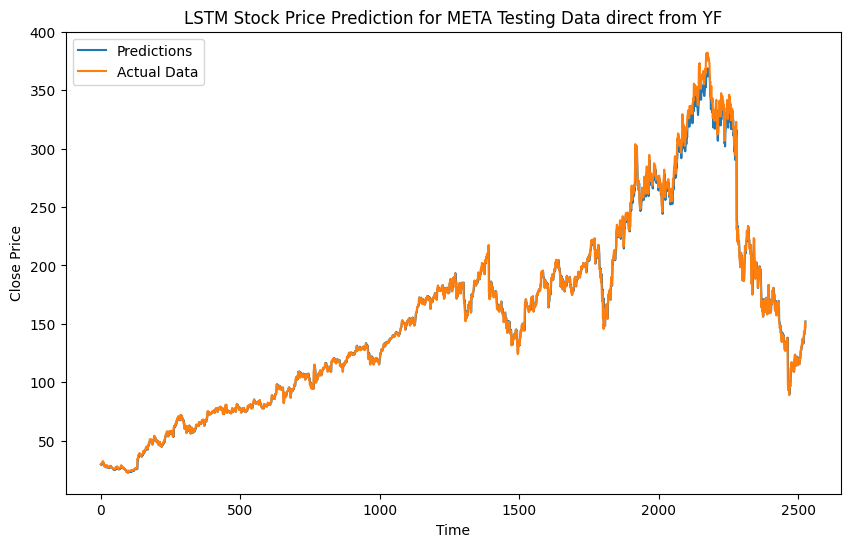

In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load the trained model
model = load_model('models/AMZN_model.keras')

# Define the ticker symbol for the stock you want to fetch data for
ticker_symbol = 'META'

# Fetch data from Yahoo Finance
data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-31')

# Extract the 'Close' prices
series = data['Close'].values.reshape(-1, 1)

# Normalize the data (using the same scaler as used during training)
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# Create sequences of data
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
    return np.array(X)

# Assuming you have defined X_test based on the new dataset
seq_length = 10  # You can adjust this value
X_test = create_sequences(series_scaled, seq_length)

# Reshape input data to be [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
test_predictions = model.predict(X_test)

# Invert predictions to original scale
test_predictions = scaler.inverse_transform(test_predictions)

# Invert actual values to original scale for comparison
actual_values = scaler.inverse_transform(series_scaled[seq_length:])


#####
r2 = r2_score(actual_values, test_predictions)
print("R-squared (R^2) Score:", r2)
#####

# Visualize the predictions and actual values
plt.figure(figsize=(10, 6))

# Plotting testing predictions
plt.plot(test_predictions, label='Predictions')

# Plotting actual testing data
plt.plot(actual_values, label='Actual Data')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title(f'LSTM Stock Price Prediction for {ticker_symbol} Testing Data direct from YF')
plt.legend()
plt.show()


In [1]:
import random

nasdaq_100_tickers = [
   , "GOOG", "COST",
    "ADBE", "AMD", "NFLX", "PEP", "CSCO", "TMUS", "INTU", "INTC", "CMCSA", ,
    "AMGN", "AMAT", "TXN",  "SBUX", "VRTX",
    "ADP", "REGN", "MDLZ", "ADI", "MU", "GILD", "KLAC", "MELI", "SNPS", "PDD",
    "CDNS", "ASML", "CRWD", "CSX", "MAR", 
]

random_tickers = random.sample(nasdaq_100_tickers, 20)

print(random_tickers)


['CRWD', 'PYPL', 'TSLA', 'NFLX', 'BKNG', 'MU', 'MSFT', 'WDAY', 'PANW', 'ADI', 'PEP', 'VRTX', 'MDLZ', 'AMD', 'ABNB', 'INTC', 'META', 'PDD', 'ISRG', 'CSCO']


In [ ]:
random_20 = ["MSFT", "AAPL", "AMZN", "NVDA",
             "CTAS", "NXPI", "MRVL", "ISRG", "LRCX", "PANW"]


In [1]:
import pandas as pd
from zipfile import ZipFile

# Define the list of tickers to extract CSVs for
random_20 = ['MSFT.csv', 'AAPL.csv', 'AMZN.csv', 'NVDA.csv', 'CTAS.csv', 'NXPI.csv', 'ISRG.csv', 'LRCX.csv', 'PANW.csv']

# Initialize an empty list to store DataFrames for each ticker
dfs = []

# Path to the zip file containing CSV data


# Load the data
try:
    with ZipFile('op-nasdaq_100.zip') as zip_file:
        for ticker in random_20:
            with zip_file.open(ticker) as file:
                data = pd.read_csv(file)
                dfs.append(data)

    # Concatenate all DataFrames into a single DataFrame
    concatenated_df = pd.concat(dfs, ignore_index=True)
    
          

except Exception as e:
    print("An error occurred:", e)
print(concatenated_df) 

An error occurred: Error tokenizing data. C error: Expected 7 fields in line 4926, saw 9



NameError: name 'concatenated_df' is not defined

In [3]:
# Loop through each CSV file in the directory
import os
directory="high_nasdaq"
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Read CSV file into a DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Extract the symbol from the filename (assuming filename is in format "symbol.csv")
        symbol = filename.split('.')[0]  # Extract symbol before the extension
        
        # Add a new column 'Symbol' with the extracted symbol
      
        
        # Append DataFrame to list
        dfs.append(df)
        

In [4]:
# Concatenate DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

In [5]:
combined_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Symbol
0,13-03-1986,0.088542,0.088542,1.031789e+09,0.101563,0.097222,0.061608,NaN
1,14-03-1986,0.097222,0.097222,3.081600e+08,0.102431,0.100694,0.063809,NaN
2,17-03-1986,0.100694,0.100694,1.331712e+08,0.103299,0.102431,0.064909,NaN
3,18-03-1986,0.098958,0.102431,6.776640e+07,0.103299,0.099826,0.063258,NaN
4,19-03-1986,0.097222,0.099826,4.789440e+07,0.100694,0.098090,0.062158,NaN


In [7]:
combined_df.shape

(339525, 8)

In [10]:
combined_df.to_csv("combined_high.csv")

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from zipfile import ZipFile

file="combined_high.csv"
# Load the data
data = pd.read_csv(file)

# Extract the 'Close' prices
series = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# Split the data into training and testing sets
train_size = int(len(series_scaled) * 0.8)
test_size = len(series_scaled) - train_size
train_data, test_data = series_scaled[0:train_size,:], series_scaled[train_size:len(series_scaled),:]

# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10  # You can adjust this value
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(20, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=1, verbose=2)


# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])




FileNotFoundError: [Errno 2] No such file or directory: 'combined_high.csv.zip'

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from zipfile import ZipFile

# Sample the data
sample_size = 10000  # Choose your desired sample size

f="combined_high.csv"
data = pd.read_csv(f)
data_sampled = data.sample(n=sample_size, random_state=42)

# Load the data
series = data_sampled['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# Split the data into training and testing sets
train_size = int(len(series_scaled) * 0.8)
test_size = len(series_scaled) - train_size
train_data, test_data = series_scaled[0:train_size,:], series_scaled[train_size:len(series_scaled),:]

# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10  # You can adjust this value
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(20, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=1, verbose=2)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])


Epoch 1/25
7990/7990 - 17s - loss: nan - 17s/epoch - 2ms/step
Epoch 2/25
7990/7990 - 16s - loss: nan - 16s/epoch - 2ms/step
Epoch 3/25
7990/7990 - 15s - loss: nan - 15s/epoch - 2ms/step
Epoch 4/25
7990/7990 - 15s - loss: nan - 15s/epoch - 2ms/step
Epoch 5/25
7990/7990 - 15s - loss: nan - 15s/epoch - 2ms/step
Epoch 6/25
7990/7990 - 15s - loss: nan - 15s/epoch - 2ms/step
Epoch 7/25
7990/7990 - 15s - loss: nan - 15s/epoch - 2ms/step
Epoch 8/25
7990/7990 - 15s - loss: nan - 15s/epoch - 2ms/step
Epoch 9/25
7990/7990 - 16s - loss: nan - 16s/epoch - 2ms/step
Epoch 10/25
7990/7990 - 15s - loss: nan - 15s/epoch - 2ms/step
Epoch 11/25
7990/7990 - 15s - loss: nan - 15s/epoch - 2ms/step
Epoch 12/25
7990/7990 - 16s - loss: nan - 16s/epoch - 2ms/step
Epoch 13/25
7990/7990 - 15s - loss: nan - 15s/epoch - 2ms/step
Epoch 14/25
7990/7990 - 15s - loss: nan - 15s/epoch - 2ms/step
Epoch 15/25
7990/7990 - 15s - loss: nan - 15s/epoch - 2ms/step
Epoch 16/25
7990/7990 - 16s - loss: nan - 16s/epoch - 2ms/step
E

In [15]:
import os
#Saving the Data

models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save the trained model in the 'models' directory
model_path = os.path.join(models_dir, "high_cap.keras")
model.save(model_path)


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from zipfile import ZipFile

# Sample the data
sample_size = 10000  # Choose your desired sample size

f="Cleaned Training Data/.csv"
data = pd.read_csv(f)
data_sampled = data.sample(n=sample_size, random_state=42)

# Load the data
series = data_sampled['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# Split the data into training and testing sets
train_size = int(len(series_scaled) * 0.8)
test_size = len(series_scaled) - train_size
train_data, test_data = series_scaled[0:train_size,:], series_scaled[train_size:len(series_scaled),:]

# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10  # You can adjust this value
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(20, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=1, verbose=2)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])


Epoch 1/25
7990/7990 - 15s - loss: 0.0029 - 15s/epoch - 2ms/step
Epoch 2/25
7990/7990 - 15s - loss: 0.0028 - 15s/epoch - 2ms/step
Epoch 3/25
7990/7990 - 15s - loss: 0.0028 - 15s/epoch - 2ms/step
Epoch 4/25
7990/7990 - 15s - loss: 0.0028 - 15s/epoch - 2ms/step
Epoch 5/25
7990/7990 - 16s - loss: 0.0028 - 16s/epoch - 2ms/step
Epoch 6/25
7990/7990 - 19s - loss: 0.0028 - 19s/epoch - 2ms/step
Epoch 7/25
7990/7990 - 15s - loss: 0.0028 - 15s/epoch - 2ms/step
Epoch 8/25
7990/7990 - 14s - loss: 0.0028 - 14s/epoch - 2ms/step
Epoch 9/25
7990/7990 - 15s - loss: 0.0028 - 15s/epoch - 2ms/step
Epoch 10/25
7990/7990 - 16s - loss: 0.0028 - 16s/epoch - 2ms/step
Epoch 11/25
7990/7990 - 16s - loss: 0.0028 - 16s/epoch - 2ms/step
Epoch 12/25
7990/7990 - 16s - loss: 0.0028 - 16s/epoch - 2ms/step
Epoch 13/25
7990/7990 - 15s - loss: 0.0028 - 15s/epoch - 2ms/step
Epoch 14/25
7990/7990 - 15s - loss: 0.0028 - 15s/epoch - 2ms/step
Epoch 15/25
7990/7990 - 15s - loss: 0.0028 - 15s/epoch - 2ms/step
Epoch 16/25
7990/79

In [20]:
import os
#Saving the Data

models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save the trained model in the 'models' directory
model_path = os.path.join(models_dir, "high_cap.keras")
model.save(model_path)


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 0s 1ms/step
R-squared (R^2) Score: -2.9712660254008445


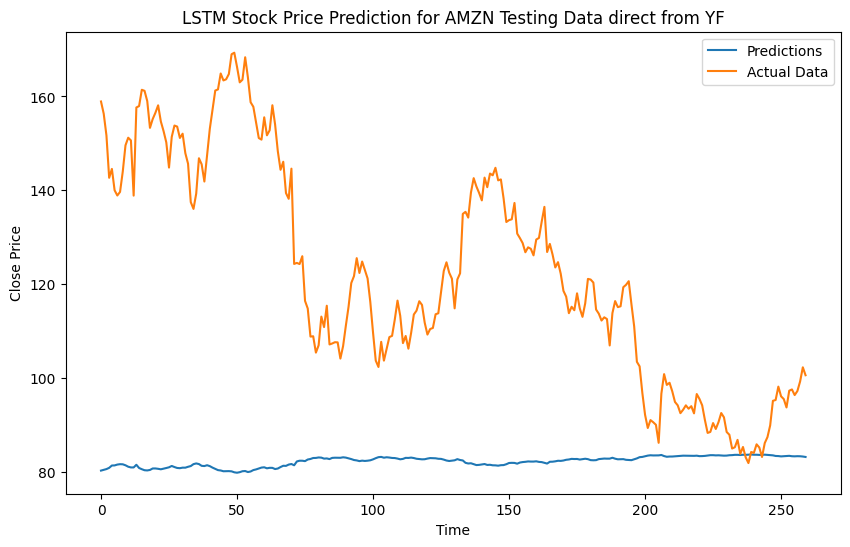

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load the trained model
model = load_model('models/high_cap.keras')

# Define the ticker symbol for the stock you want to fetch data for
ticker_symbol = 'AMZN'

# Fetch data from Yahoo Finance
data = yf.download(ticker_symbol, start='2022-01-01', end='2023-01-31')

# Extract the 'Close' prices
series = data['Close'].values.reshape(-1, 1)

# Normalize the data (using the same scaler as used during training)
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# Create sequences of data
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
    return np.array(X)

# Assuming you have defined X_test based on the new dataset
seq_length = 10  # You can adjust this value
X_test = create_sequences(series_scaled, seq_length)

# Reshape input data to be [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
test_predictions = model.predict(X_test)

# Invert predictions to original scale
test_predictions = scaler.inverse_transform(test_predictions)

# Invert actual values to original scale for comparison
actual_values = scaler.inverse_transform(series_scaled[seq_length:])


#####
r2 = r2_score(actual_values, test_predictions)
print("R-squared (R^2) Score:", r2)
#####

# Visualize the predictions and actual values
plt.figure(figsize=(10, 6))

# Plotting testing predictions
plt.plot(test_predictions, label='Predictions')

# Plotting actual testing data
plt.plot(actual_values, label='Actual Data')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title(f'LSTM Stock Price Prediction for {ticker_symbol} Testing Data direct from YF')
plt.legend()
plt.show()



In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from fbprophet import Prophet
import matplotlib.pyplot as plt

# Sample the data
sample_size = 10000  # Choose your desired sample size
f = "Cleaned Training Data/high_cap_train.csv"
data = pd.read_csv(f)
data_sampled = data.sample(n=sample_size, random_state=42)

# Rename columns
data_sampled = data_sampled.rename(columns={'Date': 'ds', 'Close': 'y'})

# Normalize the data using standard scaling
scaler = StandardScaler()
data_sampled['y_scaled'] = scaler.fit_transform(data_sampled[['y']])

# Initialize and fit Prophet model
model = Prophet()
model.fit(data_sampled)

# Make future predictions
future = model.make_future_dataframe(periods=len(data_sampled))  # Forecast for the entire dataset
forecast = model.predict(future)

# Visualize the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecasted Stock Prices')
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

Epoch 1/25
88/88 - 4s - loss: 0.9982 - val_loss: 1.1835 - 4s/epoch - 46ms/step
Epoch 2/25
88/88 - 0s - loss: 0.9961 - val_loss: 1.1824 - 320ms/epoch - 4ms/step
Epoch 3/25
88/88 - 0s - loss: 0.9952 - val_loss: 1.1839 - 278ms/epoch - 3ms/step
Epoch 4/25
88/88 - 0s - loss: 0.9955 - val_loss: 1.1831 - 283ms/epoch - 3ms/step
Epoch 5/25
88/88 - 0s - loss: 0.9948 - val_loss: 1.1833 - 252ms/epoch - 3ms/step
Epoch 6/25
88/88 - 0s - loss: 0.9945 - val_loss: 1.1830 - 263ms/epoch - 3ms/step
Epoch 7/25
88/88 - 0s - loss: 0.9948 - val_loss: 1.1848 - 286ms/epoch - 3ms/step


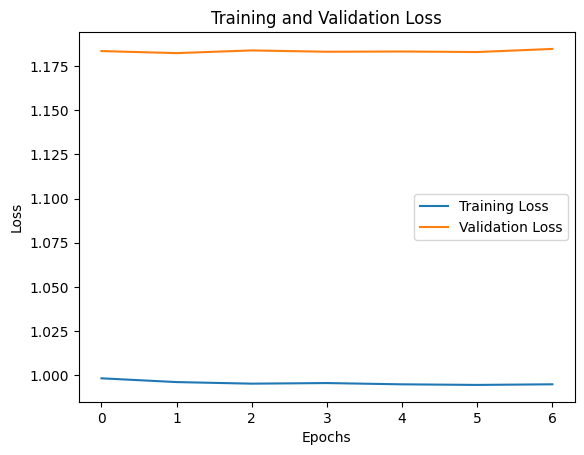

47/47 [==============================] - 0s 1ms/step
Train RMSE: 93.22396079459811
Test RMSE: 88.30533287661942


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Sample the data
sample_size = 5000  # Choose your desired sample size

f = "Cleaned Training Data/high_cap_train.csv"
data = pd.read_csv(f)
data_sampled = data.sample(n=sample_size, random_state=42)

# Load the data
series = data_sampled['Close'].values.reshape(-1, 1)

# Normalize the data using StandardScaler
scaler = StandardScaler()
series_scaled = scaler.fit_transform(series)

# Split the data into training and testing sets
train_size = int(len(series_scaled) * 0.7)
test_size = len(series_scaled) - train_size
train_data, test_data = series_scaled[0:train_size,:], series_scaled[train_size:len(series_scaled),:]

# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10  # You can adjust this value
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model architecture
model = Sequential()
model.add(LSTM(20, input_shape=(seq_length, 1)))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=2, validation_split=0.2, callbacks=[early_stopping])

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predictions[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predictions[:,0]))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train R-squared (R^2) Score: 0.001180333148834145
Test R-squared (R^2) Score: -0.0008342746318490413


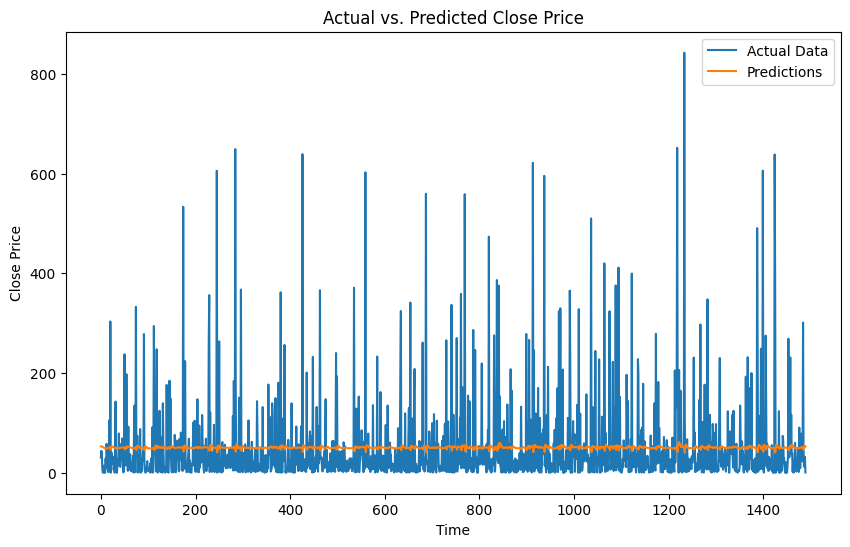

In [33]:
train_r2 = r2_score(y_train[0], train_predictions[:,0])
test_r2 = r2_score(y_test[0], test_predictions[:,0])
print("Train R-squared (R^2) Score:", train_r2)
print("Test R-squared (R^2) Score:", test_r2)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test[0], label='Actual Data')
plt.plot(test_predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.legend()
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from zipfile import ZipFile

data=pd.read_csv("Cleaned Training Data/NS10_data_merged.csv")
# # Load the data
# with ZipFile('op-nasdaq_100.zip') as zip_file:
#     with zip_file.open('NFLX.csv') as file:
#         data = pd.read_csv(file)

# Extract the 'Close' prices
series = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# Split the data into training and testing sets
train_size = int(len(series_scaled) * 0.8)
test_size = len(series_scaled) - train_size
train_data, test_data = series_scaled[0:train_size,:], series_scaled[train_size:len(series_scaled),:]

# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10  # You can adjust this value
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(30, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=2)


# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])




Epoch 1/30
22148/22148 - 46s - loss: 3.8404e-04 - 46s/epoch - 2ms/step
Epoch 2/30
22148/22148 - 43s - loss: 1.2319e-04 - 43s/epoch - 2ms/step
Epoch 3/30
22148/22148 - 47s - loss: 1.1275e-04 - 47s/epoch - 2ms/step
Epoch 4/30
22148/22148 - 47s - loss: 1.1090e-04 - 47s/epoch - 2ms/step
Epoch 5/30
22148/22148 - 46s - loss: 1.0707e-04 - 46s/epoch - 2ms/step
Epoch 6/30
22148/22148 - 47s - loss: 1.0563e-04 - 47s/epoch - 2ms/step
Epoch 7/30
22148/22148 - 44s - loss: 1.0500e-04 - 44s/epoch - 2ms/step
Epoch 8/30
22148/22148 - 47s - loss: 1.0294e-04 - 47s/epoch - 2ms/step
Epoch 9/30
22148/22148 - 45s - loss: 1.0184e-04 - 45s/epoch - 2ms/step
Epoch 10/30
22148/22148 - 44s - loss: 1.0055e-04 - 44s/epoch - 2ms/step
Epoch 11/30
22148/22148 - 45s - loss: 9.9919e-05 - 45s/epoch - 2ms/step
Epoch 12/30
22148/22148 - 51s - loss: 9.9533e-05 - 51s/epoch - 2ms/step
Epoch 13/30
22148/22148 - 50s - loss: 9.9685e-05 - 50s/epoch - 2ms/step
Epoch 14/30
22148/22148 - 53s - loss: 9.7947e-05 - 53s/epoch - 2ms/step
E

In [6]:
import os
#Saving the Data

models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save the trained model in the 'models' directory
model_path = os.path.join(models_dir, "ns10.keras")
model.save(model_path)


[*********************100%%**********************]  1 of 1 completed


111/111 [==============================] - 0s 1ms/step
R-squared (R^2) Score: 0.9985906698781315


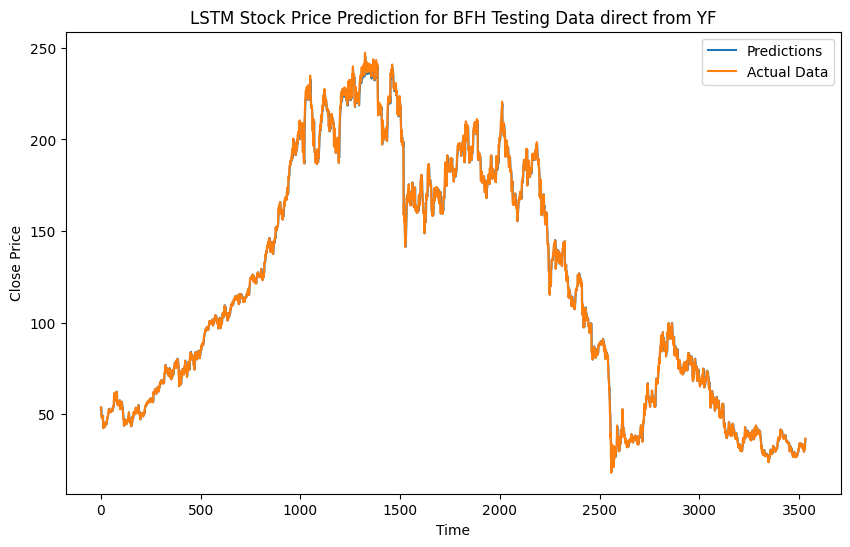

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load the trained model
model = load_model('models/ns10.keras')

# Define the ticker symbol for the stock you want to fetch data for
ticker_symbol = 'BFH'

# Fetch data from Yahoo Finance
data = yf.download(ticker_symbol, start='2010-01-01', end='2024-01-31')

# Extract the 'Close' prices
series = data['Close'].values.reshape(-1, 1)

# Normalize the data (using the same scaler as used during training)
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# Create sequences of data
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
    return np.array(X)

# Assuming you have defined X_test based on the new dataset
seq_length = 10  # You can adjust this value
X_test = create_sequences(series_scaled, seq_length)

# Reshape input data to be [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
test_predictions = model.predict(X_test)

# Invert predictions to original scale
test_predictions = scaler.inverse_transform(test_predictions)

# Invert actual values to original scale for comparison
actual_values = scaler.inverse_transform(series_scaled[seq_length:])


#####
r2 = r2_score(actual_values, test_predictions)
print("R-squared (R^2) Score:", r2)
#####

# Visualize the predictions and actual values
plt.figure(figsize=(10, 6))

# Plotting testing predictions
plt.plot(test_predictions, label='Predictions')

# Plotting actual testing data
plt.plot(actual_values, label='Actual Data')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title(f'LSTM Stock Price Prediction for {ticker_symbol} Testing Data direct from YF')
plt.legend()
plt.show()



[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 292ms/step


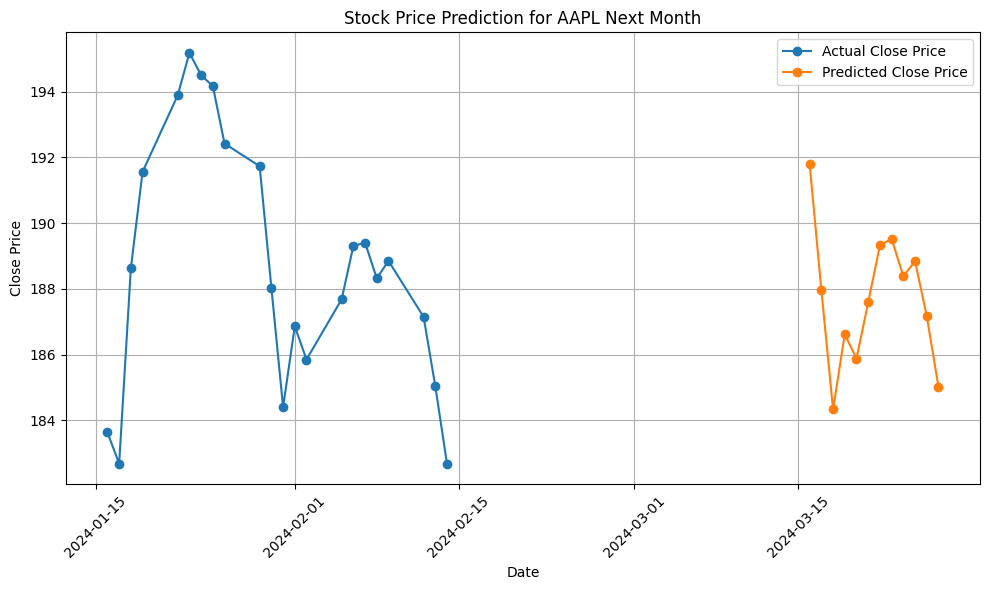

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained LSTM model
model = load_model('models/ns10.keras')

# Define the ticker symbol for the stock you want to predict
ticker_symbol = 'AAPL'

# Fetch historical stock prices from Yahoo Finance for the last month
end_date = pd.Timestamp.now()
start_date = end_date - pd.DateOffset(months=1)
historical_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract the 'Close' prices and dates from the historical data
close_prices = historical_data['Close']
dates = historical_data.index

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.values.reshape(-1, 1))

# Create sequences of data for LSTM model
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
    return np.array(X)

# Define sequence length for LSTM model
seq_length = 10

# Create sequences of data for LSTM model
X = create_sequences(close_prices_scaled, seq_length)

# Reshape input data to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Make predictions using the LSTM model
predicted_scaled = model.predict(X)

# Invert the predictions to the original scale
predicted = scaler.inverse_transform(predicted_scaled)

# Generate dates for the next month
next_month_dates = pd.date_range(end_date + pd.DateOffset(days=30), periods=len(predicted))

# Visualize the predicted stock prices for the next month
plt.figure(figsize=(10, 6))
plt.plot(dates, close_prices, label='Actual Close Price', marker='o')
plt.plot(next_month_dates, predicted, label='Predicted Close Price', marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Stock Price Prediction for {ticker_symbol} Next Month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 271ms/step


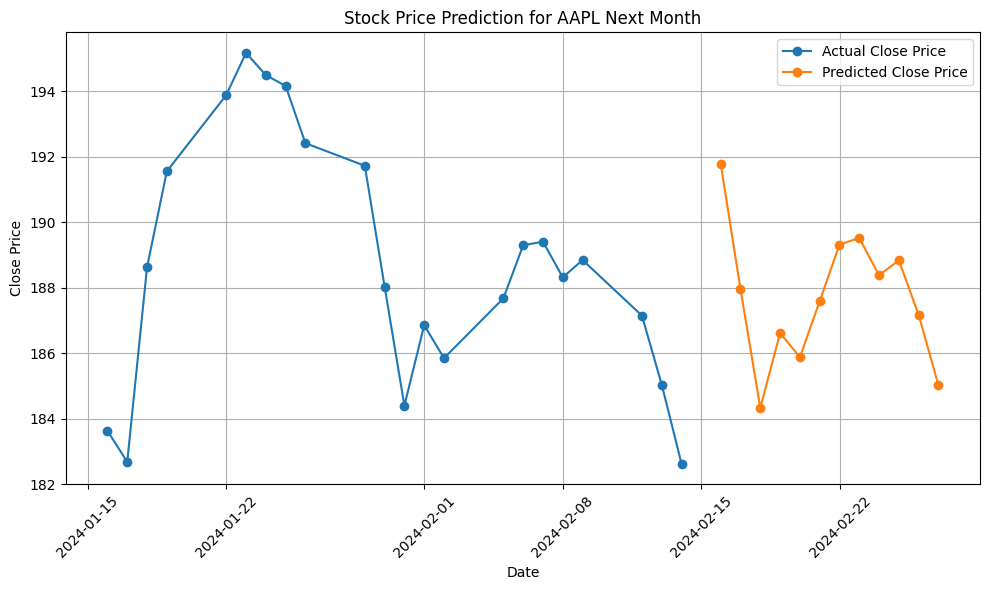

In [19]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained LSTM model
model = load_model('models/ns10.keras')

# Define the ticker symbol for the stock you want to predict
ticker_symbol = 'AAPL'

# Fetch historical stock prices from Yahoo Finance for the last month
end_date = pd.Timestamp.now()
start_date = end_date - pd.DateOffset(months=1)
historical_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract the 'Close' prices and dates from the historical data
close_prices = historical_data['Close']
dates = historical_data.index

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.values.reshape(-1, 1))

# Create sequences of data for LSTM model
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
    return np.array(X)

# Define sequence length for LSTM model
seq_length = 10

# Create sequences of data for LSTM model
X = create_sequences(close_prices_scaled, seq_length)

# Reshape input data to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Make predictions using the LSTM model
predicted_scaled = model.predict(X)

# Invert the predictions to the original scale
predicted = scaler.inverse_transform(predicted_scaled)

# Generate dates for the next month
next_month_dates = pd.date_range(end_date + pd.DateOffset(days=1), periods=len(predicted))

# Visualize the predicted stock prices for the next month
plt.figure(figsize=(10, 6))
plt.plot(dates, close_prices, label='Actual Close Price', marker='o')
plt.plot(next_month_dates, predicted, label='Predicted Close Price', marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Stock Price Prediction for {ticker_symbol} Next Month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Open Price

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from zipfile import ZipFile

data=pd.read_csv("Cleaned Training Data/NS10_data_merged.csv")
# # Load the data
# with ZipFile('op-nasdaq_100.zip') as zip_file:
#     with zip_file.open('NFLX.csv') as file:
#         data = pd.read_csv(file)

# Extract the 'Close' prices
series = data['Open'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# Split the data into training and testing sets
train_size = int(len(series_scaled) * 0.8)
test_size = len(series_scaled) - train_size
train_data, test_data = series_scaled[0:train_size,:], series_scaled[train_size:len(series_scaled),:]

# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10  # You can adjust this value
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(30, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=2)


# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])




Epoch 1/30
22148/22148 - 44s - loss: 2.5342e-04 - 44s/epoch - 2ms/step
Epoch 2/30
22148/22148 - 44s - loss: 1.1807e-04 - 44s/epoch - 2ms/step
Epoch 3/30
22148/22148 - 43s - loss: 1.1119e-04 - 43s/epoch - 2ms/step
Epoch 4/30
22148/22148 - 43s - loss: 1.0693e-04 - 43s/epoch - 2ms/step
Epoch 5/30
22148/22148 - 44s - loss: 1.0232e-04 - 44s/epoch - 2ms/step
Epoch 6/30
22148/22148 - 43s - loss: 9.9738e-05 - 43s/epoch - 2ms/step
Epoch 7/30
22148/22148 - 46s - loss: 9.8666e-05 - 46s/epoch - 2ms/step
Epoch 8/30
22148/22148 - 42s - loss: 9.7782e-05 - 42s/epoch - 2ms/step
Epoch 9/30
22148/22148 - 44s - loss: 9.7542e-05 - 44s/epoch - 2ms/step
Epoch 10/30
22148/22148 - 43s - loss: 9.7403e-05 - 43s/epoch - 2ms/step
Epoch 11/30
22148/22148 - 45s - loss: 9.6683e-05 - 45s/epoch - 2ms/step
Epoch 12/30
22148/22148 - 45s - loss: 9.5766e-05 - 45s/epoch - 2ms/step
Epoch 13/30
22148/22148 - 45s - loss: 9.4847e-05 - 45s/epoch - 2ms/step
Epoch 14/30
22148/22148 - 42s - loss: 9.4458e-05 - 42s/epoch - 2ms/step
E

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 396ms/step


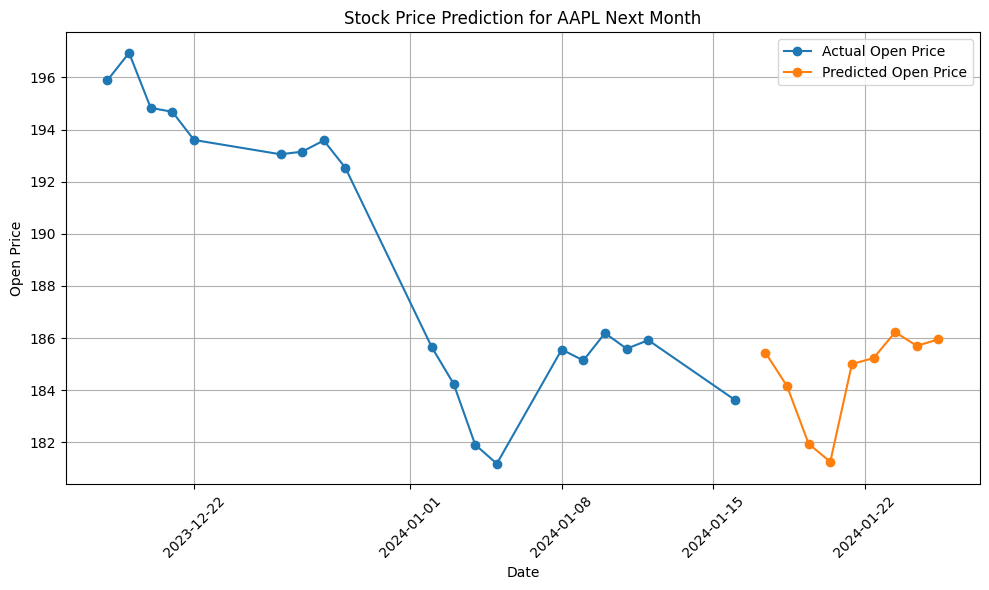

In [40]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained LSTM model
model = load_model('models/ns10.keras')

# Define the ticker symbol for the stock you want to predict
ticker_symbol = 'AAPL'

# Fetch historical stock prices from Yahoo Finance for the last month
end_date = pd.Timestamp.now()-pd.DateOffset(days=30)
start_date = end_date - pd.DateOffset(months=1)
historical_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract the 'Close' prices and dates from the historical data
close_prices = historical_data['Close']
dates = historical_data.index

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.values.reshape(-1, 1))

# Create sequences of data for LSTM model
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
    return np.array(X)

# Define sequence length for LSTM model
seq_length = 10

# Create sequences of data for LSTM model
X = create_sequences(close_prices_scaled, seq_length)

# Reshape input data to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Make predictions using the LSTM model
predicted_scaled = model.predict(X)

# Invert the predictions to the original scale
predicted = scaler.inverse_transform(predicted_scaled)

# Generate dates for the next month
next_month_dates = pd.date_range(end_date + pd.DateOffset(days=1), periods=len(predicted))

# Visualize the predicted stock prices for the next month
plt.figure(figsize=(10, 6))
plt.plot(dates, close_prices, label='Actual Open Price', marker='o')
plt.plot(next_month_dates, predicted, label='Predicted Open Price', marker='o')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title(f'Stock Price Prediction for {ticker_symbol} Next Month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Model for each stock 

In [41]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Path to the folder containing CSV files
folder_path = "Cleaned Training Data/nasdaq_10"

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Create a directory to save models if it doesn't exist
save_dir = "Saved Models"
os.makedirs(save_dir, exist_ok=True)

# Loop through each CSV file
for file in csv_files:
    # Load the data
    data = pd.read_csv(os.path.join(folder_path, file))
    
    # Extract the 'Close' prices
    series = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    series_scaled = scaler.fit_transform(series)

    # Split the data into training and testing sets
    train_size = int(len(series_scaled) * 0.8)
    test_size = len(series_scaled) - train_size
    train_data, test_data = series_scaled[0:train_size,:], series_scaled[train_size:len(series_scaled),:]

    # Create sequences of data
    seq_length = 10  # You can adjust this value
    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)

    # Reshape input data to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(30, input_shape=(seq_length, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=0)

    # Save the model with the same name as the CSV file in the new directory
    model_filename = os.path.splitext(file)[0] + ".h5"
    model_path = os.path.join(save_dir, model_filename)
    model.save(model_path)
    print(f"Model saved: {model_path}")


C:\Users\varad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved: Saved Models\AAPL.h5


C:\Users\varad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved: Saved Models\ADBE.h5


C:\Users\varad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved: Saved Models\AMZN.h5


C:\Users\varad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved: Saved Models\AVGO.h5


C:\Users\varad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved: Saved Models\COST.h5


C:\Users\varad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved: Saved Models\GOOG.h5


C:\Users\varad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved: Saved Models\GOOGL.h5


C:\Users\varad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved: Saved Models\META.h5


C:\Users\varad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved: Saved Models\MSFT.h5


C:\Users\varad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved: Saved Models\NVDA.h5
Model saved: Saved Models\TSLA.h5


C:\Users\varad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the trained LSTM model
model = load_model('models/ns10.keras')

# Define the ticker symbol for the stock you want to predict
ticker_symbol = 'MSFT'

# Fetch historical stock prices from Yahoo Finance for the last month
end_date = pd.Timestamp.now() - pd.DateOffset(days=15)
start_date = end_date - pd.DateOffset(months=1)
historical_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract the 'Close' prices and dates from the historical data
close_prices = historical_data['Close']
dates = historical_data.index

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.values.reshape(-1, 1))

# Create sequences of data for LSTM model
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
    return np.array(X)

# Define sequence length for LSTM model
seq_length = 10

# Create sequences of data for LSTM model
X = create_sequences(close_prices_scaled, seq_length)

# Reshape input data to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Make predictions using the LSTM model
predicted_scaled = model.predict(X)

# Invert the predictions to the original scale
predicted = scaler.inverse_transform(predicted_scaled)

# Generate dates for the next month
next_month_dates = pd.date_range(end_date + pd.DateOffset(days=1), periods=len(predicted))

# Visualize the predicted stock prices for the next month
plt.figure(figsize=(10, 6))
plt.plot(dates, close_prices, label='Actual Close Price', marker='o')
plt.plot(next_month_dates, predicted, label='Predicted Close Price', marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Stock Price Prediction for {ticker_symbol} Next Month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(close_prices[seq_length:], predicted))

print("RMSE:", rmse)


OSError: No file or directory found at models/ns10.keras